# Measuring warping while ablating context

In [3]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.reset_defaults()
# sns.set_style("whitegrid") #  {darkgrid, whitegrid, dark, white, ticks}
# sns.set_context("talk")

In [24]:
def load_results(results_fn, rep_name):
    results_dir = '../../results/'
    scales = ['0p%d' % s for s in range(1,10)]
    scales.append('1p0')
    results_fns = [results_fn + '_ctx_scale' + s + '.P' for s in scales]
    results_paths = [os.path.join(results_dir,fn) for fn in results_fns]
    
    ratio_data = []
    for path in results_paths:
        with open(path, 'rb') as f:
            data = pickle.load(f)
    
        # Get ratio results
        analysis = data['analysis']
        ratios = []
        for run in analysis:
            ratios.append([s['distance_ratio'][rep_name]['ratio'] for s in run])
        dist_ratios = np.array(ratios)
        mean_ratios = np.mean(dist_ratios, axis=0)
        sem_ratios = np.std(dist_ratios, axis=0) / np.sqrt(len(dist_ratios))
        ratio_data.append((mean_ratios, sem_ratios))

    return ratio_data

In [64]:
def plot_results(ratio_data, title, save_fn):
    n_checkpoints = len(ratio_data[0][0])
    scales = ['%.1f' % s for s in np.linspace(0.1,1,10)]
    x = [i for i in range(n_checkpoints)]
    x_labels = [i*analyze_every for i in range(n_checkpoints)]
    xticks = [2*i for i in range((n_checkpoints // 2) + 1)]
    xtick_labels = [xtick*analyze_every for xtick in xticks]
    cmap = plt.get_cmap('winter')
    colors = [cmap(xx) for xx in reversed(np.linspace(0.2,0.7,len(ratio_data)))]
    
    fig, ax = plt.subplots()
    for (mu, sem), c in zip(ratio_data, colors):
        ax.errorbar(x, mu, yerr=sem, color=c)
    ax.set_title("Ablating context facilitates warping")
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels)
    ax.set_xlabel("Steps")
    ax.set_ylabel("Distance ratio (congruent / incongruent)")
    ax.set_ylim([0.0, 4.7])
    #ax.legend(scales, loc='upper left')
    ax.axhline(y=1, linestyle='--', color='k', linewidth=2)
    
    # Save figure
    if save_fn is not None:
        #plt.savefig(save_fn, dpi=1000, format='eps', bbox_inches='tight')
        plt.savefig(save_fn, dpi=1000, format='eps', bbox_inches='tight')
    
    plt.show()

## MLP

In [65]:
results_fn = 'mlp'
rep_name = 'hidden'
analyze_every = 50
title = 'MLP'
save_fn = '../../figures/mlp_ctx_scale.eps'

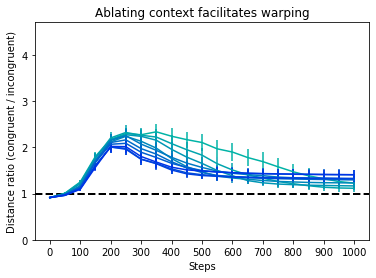

In [66]:
ratio_data = load_results(results_fn, rep_name)
plot_results(ratio_data, title, save_fn)

## RNN

In [67]:
results_fn = 'rnn'
rep_name = 'average'
analyze_every = 50
title = "RNN"
save_fn = '../../figures/rnn_ctx_scale.eps'

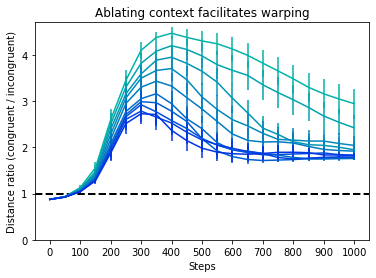

In [68]:
ratio_data = load_results(results_fn, rep_name)
plot_results(ratio_data, title, save_fn)